# Sentimental analysis on Twitter data for cyberbullying


# Importing the necessary libraries

In [1]:
import pandas as pd
import snscrape.modules.twitter as sntwitter #for scraping tweets 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import re
from wordcloud import WordCloud,STOPWORDS
from PIL import Image
from textblob import TextBlob

# Data collection from Twitter

In [30]:
# Setting variables to be used below
search = '"#cyberbullying" since:2019-6-1 until:2022-2-17'
maxTweets = 100000

# Creating list to append tweet data to
tweets_list1 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper(search).get_items()):
    if i>maxTweets:
        break
    tweets_list1.append([tweet.date, tweet.id, tweet.content, tweet.user.username,tweet.hashtags, tweet.user.location])

In [31]:
tweets_df1 = pd.DataFrame(tweets_list1, columns=['Datetime', 'Tweet Id', 'Text', 'Username','hashtags','location'])

# Display first 5 entries from dataframe
tweets_df1

Datetime             Tweet Id  \
0     2022-02-16 23:48:30+00:00  1494096378284359680   
1     2022-02-16 23:36:08+00:00  1494093267616485381   
2     2022-02-16 23:33:33+00:00  1494092618480771073   
3     2022-02-16 23:31:26+00:00  1494092084118274052   
4     2022-02-16 22:31:12+00:00  1494076927329644549   
...                         ...                  ...   
63817 2019-06-01 00:14:02+00:00  1134614042658496512   
63818 2019-06-01 00:12:14+00:00  1134613588646060032   
63819 2019-06-01 00:09:19+00:00  1134612857046257664   
63820 2019-06-01 00:03:33+00:00  1134611405221507073   
63821 2019-06-01 00:02:14+00:00  1134611070855856128   

                                                    Text        Username  \
0      Ask A Therapist: How Can I Protect My Child fr...          bcbssc   
1      #IStandWithNicky #Twitter #Harassment #FalseAc...    RLJewperhero   
2      #IStandWithNicky #Twitter #CheckTheFacts #Brok...    RLJewperhero   
3      #Cyberbullying pode Aumentar Insônia e Depress...       drrondojr   
4      Shout out to our #cyberbullying course that he...      iAchieveLS   
...                                                  ...             ...   
63817  #sports #cyberbullying #cyberharassment  \nhtt...    HarassNoMore   
63818  WIR: Cyber Bullying And Stalking Guide Review ...    HarassNoMore   
63819  Brits increasingly concerned about going onlin...    HarassNoMore   
63820  #kids #cyberrisks #cyberbullying #prevention #...    HarassNoMore   
63821  One-Fifth of Children Experience Cyberbullying...  thepowerseries   

                                                hashtags  \
0                                        [cyberbullying]   
1      [IStandWithNicky, Twitter, Harassment, FalseAc...   
2      [IStandWithNicky, Twitter, CheckTheFacts, Brok...   
3                              [Cyberbullying, Bullying]   
4                      [cyberbullying, SaferInternetDay]   
...                                                  ...   
63817           [sports, cyberbullying, cyberharassment]   
63818                     [cyberbullying, cyberstalking]   
63819          [cyberbullying, socialmedia, etechnology]   
63820  [kids, cyberrisks, cyberbullying, prevention, ...   
63821                                    [cyberbullying]   

                         location  
0             South Carolina, USA  
1                 Bakersfield, CA  
2                 Bakersfield, CA  
3                       São Paulo  
4                                  
...                           ...  
63817  Victoria, British Columbia  
63818  Victoria, British Columbia  
63819  Victoria, British Columbia  
63820  Victoria, British Columbia  
63821                 Raleigh, NC  

[63822 rows x 6 columns]

# Creating a dataframe for Hashtags

In [38]:
#hash=[]
#for i in range(63809):
    #for j in range(len(tweets_df1['hashtags'][i])):
        #hash.append(tweets_df1['hashtags'][i][j]) 

In [41]:
#for i in range(len(hash)):
    #hash[i] = hash[i].lower()

In [43]:
#hash=np.array(hash)
#(unique,count)=np.unique(hash,return_counts=True)  
#data_hash=pd.DataFrame({'hashtag':unique,'frequency':count})
#data_hash

hashtag  frequency
0                  04noviembre          1
1      0selbstbewusstseinübrig          1
2                10000startups          1
3                    1000speak          2
4               100bobforfelix          1
...                        ...        ...
29763            ｒｉｐｈａｎａｋｉｍｕｒａ          2
29764  𝐁𝐮𝐥𝐥𝐲𝐢𝐧𝐠𝐏𝐫𝐞𝐯𝐞𝐧𝐭𝐢𝐨𝐧𝗠𝗼𝗻𝘁𝗵          2
29765         𝐄𝐒𝐖𝐈𝐑𝐃𝐁𝐄𝐒𝐒𝐄𝐑film          1
29766                   𝑶𝒏𝒍𝒊𝒏𝒆          1
29767                       𝗘𝗨          2

[29768 rows x 2 columns]

# Converting the data into a csv file

In [45]:
#tweets_df1.to_csv('cyberbullying1.csv')

In [2]:
data = pd.read_csv('cyberbullying1.csv')
data

Unnamed: 0  index                   Datetime             Tweet Id  \
0               0      0  2022-02-16 23:48:30+00:00  1494096378284359680   
1               1      1  2022-02-16 23:36:08+00:00  1494093267616485381   
2               2      2  2022-02-16 23:33:33+00:00  1494092618480771073   
3               3      3  2022-02-16 23:31:26+00:00  1494092084118274052   
4               4      4  2022-02-16 22:31:12+00:00  1494076927329644549   
...           ...    ...                        ...                  ...   
63805       63805  63817  2019-06-01 00:14:02+00:00  1134614042658496512   
63806       63806  63818  2019-06-01 00:12:14+00:00  1134613588646060032   
63807       63807  63819  2019-06-01 00:09:19+00:00  1134612857046257664   
63808       63808  63820  2019-06-01 00:03:33+00:00  1134611405221507073   
63809       63809  63821  2019-06-01 00:02:14+00:00  1134611070855856128   

                                                    Text        Username  \
0      Ask A Therapist: How Can I Protect My Child fr...          bcbssc   
1      #IStandWithNicky #Twitter #Harassment #FalseAc...    RLJewperhero   
2      #IStandWithNicky #Twitter #CheckTheFacts #Brok...    RLJewperhero   
3      #Cyberbullying pode Aumentar Insônia e Depress...       drrondojr   
4      Shout out to our #cyberbullying course that he...      iAchieveLS   
...                                                  ...             ...   
63805  #sports #cyberbullying #cyberharassment  \nhtt...    HarassNoMore   
63806  WIR: Cyber Bullying And Stalking Guide Review ...    HarassNoMore   
63807  Brits increasingly concerned about going onlin...    HarassNoMore   
63808  #kids #cyberrisks #cyberbullying #prevention #...    HarassNoMore   
63809  One-Fifth of Children Experience Cyberbullying...  thepowerseries   

                                                hashtags  \
0                                      ['cyberbullying']   
1      ['IStandWithNicky', 'Twitter', 'Harassment', '...   
2      ['IStandWithNicky', 'Twitter', 'CheckTheFacts'...   
3                          ['Cyberbullying', 'Bullying']   
4                  ['cyberbullying', 'SaferInternetDay']   
...                                                  ...   
63805     ['sports', 'cyberbullying', 'cyberharassment']   
63806                 ['cyberbullying', 'cyberstalking']   
63807    ['cyberbullying', 'socialmedia', 'etechnology']   
63808  ['kids', 'cyberrisks', 'cyberbullying', 'preve...   
63809                                  ['cyberbullying']   

                         location  
0             South Carolina, USA  
1                 Bakersfield, CA  
2                 Bakersfield, CA  
3                       São Paulo  
4                             NaN  
...                           ...  
63805  Victoria, British Columbia  
63806  Victoria, British Columbia  
63807  Victoria, British Columbia  
63808  Victoria, British Columbia  
63809                 Raleigh, NC  

[63810 rows x 8 columns]

# Converting the hashtags into a csv file

In [6]:
#data_hash.to_csv('cyberbullyinghash.csv')

In [3]:
data_hash= pd.read_csv('cyberbullyinghash.csv')


In [4]:
data_hash.drop(['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1','Unnamed: 0.1.1.1.1.1'], axis=1, inplace=True)

In [5]:
data_hash

hashtag  frequency
0                  04noviembre          1
1      0selbstbewusstseinübrig          1
2                10000startups          1
3                    1000speak          2
4               100bobforfelix          1
...                        ...        ...
29763            ｒｉｐｈａｎａｋｉｍｕｒａ          2
29764  𝐁𝐮𝐥𝐥𝐲𝐢𝐧𝐠𝐏𝐫𝐞𝐯𝐞𝐧𝐭𝐢𝐨𝐧𝗠𝗼𝗻𝘁𝗵          2
29765         𝐄𝐒𝐖𝐈𝐑𝐃𝐁𝐄𝐒𝐒𝐄𝐑film          1
29766                   𝑶𝒏𝒍𝒊𝒏𝒆          1
29767                       𝗘𝗨          2

[29768 rows x 2 columns]

# Data cleaning

In [6]:
data=data.dropna().reset_index(drop=False)

In [7]:
data['hashtags'].isnull().sum()

0

In [8]:
data.isnull().sum()

level_0       0
Unnamed: 0    0
index         0
Datetime      0
Tweet Id      0
Text          0
Username      0
hashtags      0
location      0
dtype: int64

In [9]:
data

level_0  Unnamed: 0  index                   Datetime  \
0            0           0      0  2022-02-16 23:48:30+00:00   
1            1           1      1  2022-02-16 23:36:08+00:00   
2            2           2      2  2022-02-16 23:33:33+00:00   
3            3           3      3  2022-02-16 23:31:26+00:00   
4            5           5      5  2022-02-16 22:30:04+00:00   
...        ...         ...    ...                        ...   
45015    63805       63805  63817  2019-06-01 00:14:02+00:00   
45016    63806       63806  63818  2019-06-01 00:12:14+00:00   
45017    63807       63807  63819  2019-06-01 00:09:19+00:00   
45018    63808       63808  63820  2019-06-01 00:03:33+00:00   
45019    63809       63809  63821  2019-06-01 00:02:14+00:00   

                  Tweet Id                                               Text  \
0      1494096378284359680  Ask A Therapist: How Can I Protect My Child fr...   
1      1494093267616485381  #IStandWithNicky #Twitter #Harassment #FalseAc...   
2      1494092618480771073  #IStandWithNicky #Twitter #CheckTheFacts #Brok...   
3      1494092084118274052  #Cyberbullying pode Aumentar Insônia e Depress...   
4      1494076641483575298  Also kann mir jemand erklären wieso man das Ha...   
...                    ...                                                ...   
45015  1134614042658496512  #sports #cyberbullying #cyberharassment  \nhtt...   
45016  1134613588646060032  WIR: Cyber Bullying And Stalking Guide Review ...   
45017  1134612857046257664  Brits increasingly concerned about going onlin...   
45018  1134611405221507073  #kids #cyberrisks #cyberbullying #prevention #...   
45019  1134611070855856128  One-Fifth of Children Experience Cyberbullying...   

             Username                                           hashtags  \
0              bcbssc                                  ['cyberbullying']   
1        RLJewperhero  ['IStandWithNicky', 'Twitter', 'Harassment', '...   
2        RLJewperhero  ['IStandWithNicky', 'Twitter', 'CheckTheFacts'...   
3           drrondojr                      ['Cyberbullying', 'Bullying']   
4             Ari0_29                  ['Cybermobbing', 'CyberBullying']   
...               ...                                                ...   
45015    HarassNoMore     ['sports', 'cyberbullying', 'cyberharassment']   
45016    HarassNoMore                 ['cyberbullying', 'cyberstalking']   
45017    HarassNoMore    ['cyberbullying', 'socialmedia', 'etechnology']   
45018    HarassNoMore  ['kids', 'cyberrisks', 'cyberbullying', 'preve...   
45019  thepowerseries                                  ['cyberbullying']   

                         location  
0             South Carolina, USA  
1                 Bakersfield, CA  
2                 Bakersfield, CA  
3                       São Paulo  
4                  In meiner Zone  
...                           ...  
45015  Victoria, British Columbia  
45016  Victoria, British Columbia  
45017  Victoria, British Columbia  
45018  Victoria, British Columbia  
45019                 Raleigh, NC  

[45020 rows x 9 columns]

In [11]:
df_sort=data_hash.sort_values('frequency',ascending=False).reset_index(drop=False)

#  Plotting the graph using hashtags 

# Top most used 15 hashtags related to cyberbullying

In [12]:
px.bar(x = df_sort['hashtag'][0:15], y = df_sort['frequency'][0:15], color= df_sort['hashtag'][0:15],
       labels={'x': 'Hashtags', 'y': 'Frequency'})

(0.0, 100.0, 0.0, 100.0)

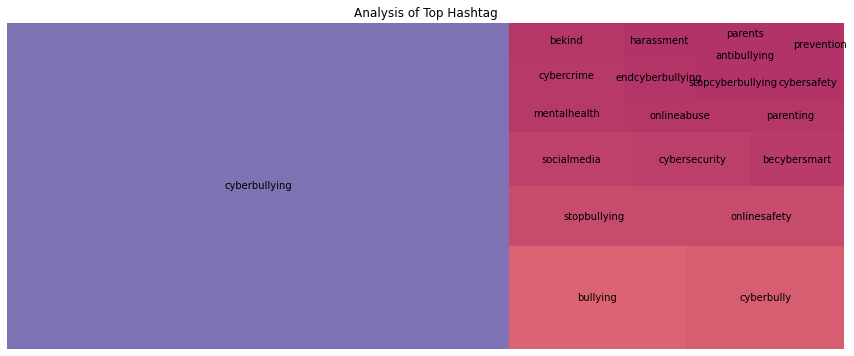

In [12]:
#Tree map
import squarify 
import matplotlib as mt
cmap = mt.cm.Spectral
mini=min(df_sort['frequency'][0:20])
maxi=max(df_sort['frequency'][0:20])
norm = mt.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in df_sort['frequency'][0:20]]
plt.figure(figsize=(15,6))
squarify.plot(sizes=df_sort['frequency'][0:20],label=df_sort['hashtag'][0:40], alpha=.8,color=colors)

plt.title('Analysis of Top Hashtag')

plt.axis('off')

# Sentimental Analysis

In [13]:
data['Text'] =data['Text'].str.replace('\d+','') 
data['Text'] =data['Text'].str.replace('.','') 
def remove_pattern(input_txt):
    r = re.sub("[^a-zA-Z]"," ",str(input_txt)) 
    r = re.findall(r"@(w+)", str(input_txt))   
    for i in r:
        input_txt = re.sub(i, '', input_txt)    
    return input_txt
data['@_remove'] = np.vectorize(remove_pattern)(data['Text']) 
data['@_remove'][:3]

def cleanTxt(text):
    text = re.sub('[^a-zA-Z]', ' ', str(text)) 
    text=re.sub(r'#','',str(text)) 
    text = re.sub('http[^\s]+','',str(text)) 
    text=re.sub(r'@[A-Za-z0-9]+','',str(text)) 
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF" 
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', str(text))

data['Text']=data['Text'].apply(cleanTxt) 

def sentiment_scores(sentence):
    s=TextBlob(sentence) 
    sentiment_dict = s.sentiment.polarity 
    if sentiment_dict>0 and sentiment_dict<=1:
        return "positive"
    elif sentiment_dict<0 :
        return "negative"
    elif sentiment_dict==0 :
        return "neutral"

l=[sentiment_scores(i) for i in data.Text]
data["labels"] = l



# Pie chart for Sentimental analysis

([<matplotlib.patches.Wedge at 0x1a97dfe83a0>,
 [Text(-1.0713118597402764, 0.24958144798808776, 'Positive'),
  Text(0.835373781762917, -0.7156470112724027, 'Neutral'),
  Text(0.5074430295455772, 0.9759618700367381, 'Negative')],
 [Text(-0.5843519234946961, 0.13613533526622967, '43%'),
  Text(0.45565842641613646, -0.3903529152394924, '42%'),
  Text(0.27678710702486026, 0.532342838201857, '15%')])

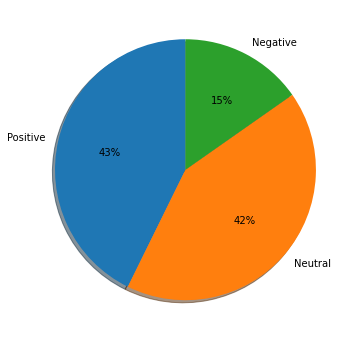

In [14]:
fig = plt.figure(figsize =(10, 6))
plt.pie(data.labels.value_counts(), autopct='%1.0f%%',startangle=90,shadow=True,labels=['Positive','Neutral','Negative'])

# Donut chart for sentimental analysis

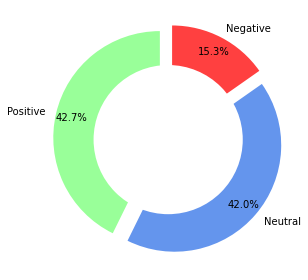

In [15]:
colors = ['#99ff99','#6495ED','#FF4040']
explode = (0.08,0.08,0.08)
 
plt.pie(data.labels.value_counts(),colors = colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode,labels=['Positive','Neutral','Negative'])
centre_circle = plt.Circle((0,0),0.70,fc='white') #plt.circle plots the graph in circle
fig = plt.gcf() #get current figure
fig.gca().add_artist(centre_circle) 
plt.tight_layout()
plt.show()

# Plotting weekly analysis

In [16]:
data['Datetime']=pd.to_datetime(data['Datetime'])

In [17]:
data['Week']=data['Datetime'].dt.to_period('W').astype(str)

In [18]:
data

level_0  Unnamed: 0  index                  Datetime  \
0            0           0      0 2022-02-16 23:48:30+00:00   
1            1           1      1 2022-02-16 23:36:08+00:00   
2            2           2      2 2022-02-16 23:33:33+00:00   
3            3           3      3 2022-02-16 23:31:26+00:00   
4            5           5      5 2022-02-16 22:30:04+00:00   
...        ...         ...    ...                       ...   
45015    63805       63805  63817 2019-06-01 00:14:02+00:00   
45016    63806       63806  63818 2019-06-01 00:12:14+00:00   
45017    63807       63807  63819 2019-06-01 00:09:19+00:00   
45018    63808       63808  63820 2019-06-01 00:03:33+00:00   
45019    63809       63809  63821 2019-06-01 00:02:14+00:00   

                  Tweet Id                                               Text  \
0      1494096378284359680  Ask A Therapist  How Can I Protect My Child fr...   
1      1494093267616485381   IStandWithNicky  Twitter  Harassment  FalseAc...   
2      1494092618480771073   IStandWithNicky  Twitter  CheckTheFacts  Brok...   
3      1494092084118274052   Cyberbullying pode Aumentar Ins nia e Depress...   
4      1494076641483575298  Also kann mir jemand erkl ren wieso man das Ha...   
...                    ...                                                ...   
45015  1134614042658496512   sports  cyberbullying  cyberharassment      t...   
45016  1134613588646060032  WIR  Cyber Bullying And Stalking Guide Review ...   
45017  1134612857046257664  Brits increasingly concerned about going onlin...   
45018  1134611405221507073   kids  cyberrisks  cyberbullying  prevention  ...   
45019  1134611070855856128  One Fifth of Children Experience Cyberbullying...   

             Username                                           hashtags  \
0              bcbssc                                  ['cyberbullying']   
1        RLJewperhero  ['IStandWithNicky', 'Twitter', 'Harassment', '...   
2        RLJewperhero  ['IStandWithNicky', 'Twitter', 'CheckTheFacts'...   
3           drrondojr                      ['Cyberbullying', 'Bullying']   
4             Ari0_29                  ['Cybermobbing', 'CyberBullying']   
...               ...                                                ...   
45015    HarassNoMore     ['sports', 'cyberbullying', 'cyberharassment']   
45016    HarassNoMore                 ['cyberbullying', 'cyberstalking']   
45017    HarassNoMore    ['cyberbullying', 'socialmedia', 'etechnology']   
45018    HarassNoMore  ['kids', 'cyberrisks', 'cyberbullying', 'preve...   
45019  thepowerseries                                  ['cyberbullying']   

                         location  \
0             South Carolina, USA   
1                 Bakersfield, CA   
2                 Bakersfield, CA   
3                       São Paulo   
4                  In meiner Zone   
...                           ...   
45015  Victoria, British Columbia   
45016  Victoria, British Columbia   
45017  Victoria, British Columbia   
45018  Victoria, British Columbia   
45019                 Raleigh, NC   

                                                @_remove    labels  \
0      Ask A Therapist: How Can I Protect My Child fr...  positive   
1      #IStandWithNicky #Twitter #Harassment #FalseAc...   neutral   
2      #IStandWithNicky #Twitter #CheckTheFacts #Brok...   neutral   
3      #Cyberbullying pode Aumentar Insônia e Depress...  negative   
4      Also kann mir jemand erklären wieso man das Ha...  positive   
...                                                  ...       ...   
45015  #sports #cyberbullying #cyberharassment  \nhtt...   neutral   
45016  WIR: Cyber Bullying And Stalking Guide Review ...   neutral   
45017  Brits increasingly concerned about going onlin...   neutral   
45018  #kids #cyberrisks #cyberbullying #prevention #...   neutral   
45019  One-Fifth of Children Experience Cyberbullying...   neutral   

                        Week  
0      2022-02-14/2022-02-20  
1      2022-02-1

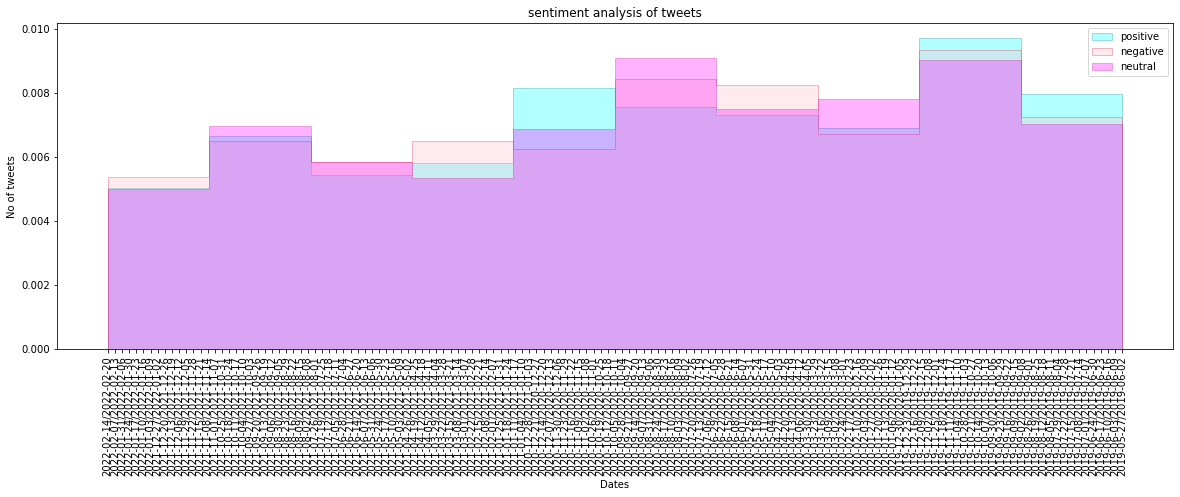

In [19]:
plt.figure(figsize=(20,6))
cl_df = data["Week"][data["labels"] == "positive"]
sa_df = data["Week"][data["labels"] == "negative"]
tr_df = data["Week"][data["labels"] == "neutral"]
plt.hist(cl_df,color='cyan',alpha=0.3,label='positive',histtype='stepfilled',density=True,edgecolor='darkcyan')
plt.hist(sa_df,color='pink',alpha=0.3,label='negative',histtype='stepfilled',density=True,edgecolor='crimson')
plt.hist(tr_df,alpha=0.3,color='magenta',label='neutral',histtype='stepfilled',density=True,edgecolor='mediumvioletred')
plt.legend()
plt.xticks(rotation=90)
plt.title("sentiment analysis of tweets")
plt.xlabel("Dates")
plt.ylabel("No of tweets")
plt.show()

# Plotting monthly analysis 

In [20]:
data['Datetime'] = pd.to_datetime(data['Datetime'])

In [21]:
data['months']=data['Datetime'].dt.to_period('M').astype(str)
data

level_0  Unnamed: 0  index                  Datetime  \
0            0           0      0 2022-02-16 23:48:30+00:00   
1            1           1      1 2022-02-16 23:36:08+00:00   
2            2           2      2 2022-02-16 23:33:33+00:00   
3            3           3      3 2022-02-16 23:31:26+00:00   
4            5           5      5 2022-02-16 22:30:04+00:00   
...        ...         ...    ...                       ...   
45015    63805       63805  63817 2019-06-01 00:14:02+00:00   
45016    63806       63806  63818 2019-06-01 00:12:14+00:00   
45017    63807       63807  63819 2019-06-01 00:09:19+00:00   
45018    63808       63808  63820 2019-06-01 00:03:33+00:00   
45019    63809       63809  63821 2019-06-01 00:02:14+00:00   

                  Tweet Id                                               Text  \
0      1494096378284359680  Ask A Therapist  How Can I Protect My Child fr...   
1      1494093267616485381   IStandWithNicky  Twitter  Harassment  FalseAc...   
2      1494092618480771073   IStandWithNicky  Twitter  CheckTheFacts  Brok...   
3      1494092084118274052   Cyberbullying pode Aumentar Ins nia e Depress...   
4      1494076641483575298  Also kann mir jemand erkl ren wieso man das Ha...   
...                    ...                                                ...   
45015  1134614042658496512   sports  cyberbullying  cyberharassment      t...   
45016  1134613588646060032  WIR  Cyber Bullying And Stalking Guide Review ...   
45017  1134612857046257664  Brits increasingly concerned about going onlin...   
45018  1134611405221507073   kids  cyberrisks  cyberbullying  prevention  ...   
45019  1134611070855856128  One Fifth of Children Experience Cyberbullying...   

             Username                                           hashtags  \
0              bcbssc                                  ['cyberbullying']   
1        RLJewperhero  ['IStandWithNicky', 'Twitter', 'Harassment', '...   
2        RLJewperhero  ['IStandWithNicky', 'Twitter', 'CheckTheFacts'...   
3           drrondojr                      ['Cyberbullying', 'Bullying']   
4             Ari0_29                  ['Cybermobbing', 'CyberBullying']   
...               ...                                                ...   
45015    HarassNoMore     ['sports', 'cyberbullying', 'cyberharassment']   
45016    HarassNoMore                 ['cyberbullying', 'cyberstalking']   
45017    HarassNoMore    ['cyberbullying', 'socialmedia', 'etechnology']   
45018    HarassNoMore  ['kids', 'cyberrisks', 'cyberbullying', 'preve...   
45019  thepowerseries                                  ['cyberbullying']   

                         location  \
0             South Carolina, USA   
1                 Bakersfield, CA   
2                 Bakersfield, CA   
3                       São Paulo   
4                  In meiner Zone   
...                           ...   
45015  Victoria, British Columbia   
45016  Victoria, British Columbia   
45017  Victoria, British Columbia   
45018  Victoria, British Columbia   
45019                 Raleigh, NC   

                                                @_remove    labels  \
0      Ask A Therapist: How Can I Protect My Child fr...  positive   
1      #IStandWithNicky #Twitter #Harassment #FalseAc...   neutral   
2      #IStandWithNicky #Twitter #CheckTheFacts #Brok...   neutral   
3      #Cyberbullying pode Aumentar Insônia e Depress...  negative   
4      Also kann mir jemand erklären wieso man das Ha...  positive   
...                                                  ...       ...   
45015  #sports #cyberbullying #cyberharassment  \nhtt...   neutral   
45016  WIR: Cyber Bullying And Stalking Guide Review ...   neutral   
45017  Brits increasingly concerned about going onlin...   neutral   
45018  #kids #cyberrisks #cyberbullying #prevention #...   neutral   
45019  One-Fifth of Children Experience Cyberbullying...   neutral   

                        Week   months  
0      2022-02-14/2022-02-20  2022-02 

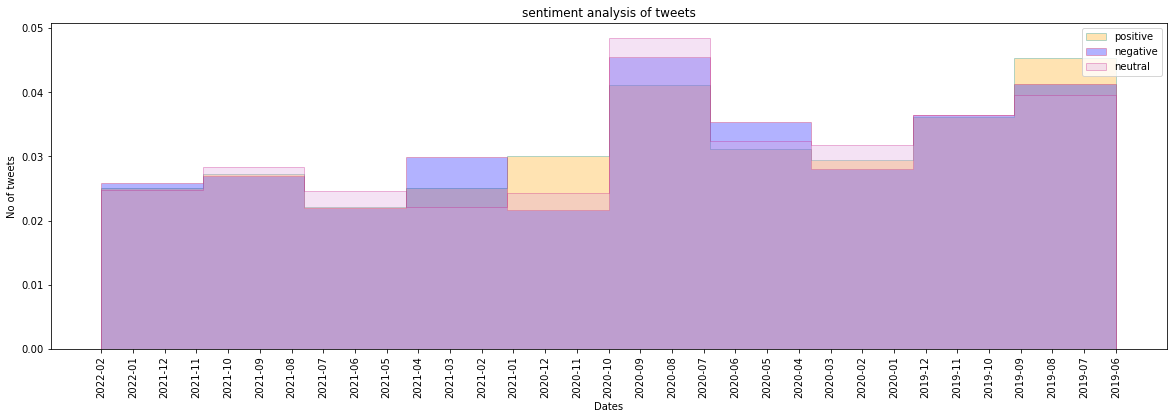

In [22]:
plt.figure(figsize=(20,6))
cl_df = data["months"][data["labels"] == "positive"]
sa_df = data["months"][data["labels"] == "negative"]
tr_df = data["months"][data["labels"] == "neutral"]
plt.hist(cl_df,color='orange',alpha=0.3,label='positive',histtype='stepfilled',density=True,edgecolor='darkcyan')
plt.hist(sa_df,color='blue',alpha=0.3,label='negative',histtype='stepfilled',density=True,edgecolor='crimson')
plt.hist(tr_df,alpha=0.3,color='plum',label='neutral',histtype='stepfilled',density=True,edgecolor='mediumvioletred')
plt.legend()
plt.xticks(rotation=90)
plt.title("sentiment analysis of tweets")
plt.xlabel("Dates")
plt.ylabel("No of tweets")
plt.show()

CONCLUSION :
    We can observe that the negative tweets for cyberbullying has increased during the pandemic lockdown period 

# WORD CLOUD

In [23]:
knp=data[data['labels']=='positive'] 
knp

level_0  Unnamed: 0  index                  Datetime  \
0            0           0      0 2022-02-16 23:48:30+00:00   
4            5           5      5 2022-02-16 22:30:04+00:00   
6            8           8      8 2022-02-16 21:58:05+00:00   
7            9           9      9 2022-02-16 20:03:18+00:00   
8           11          11     11 2022-02-16 19:50:56+00:00   
...        ...         ...    ...                       ...   
45006    63793       63793  63805 2019-06-01 07:56:59+00:00   
45008    63795       63795  63807 2019-06-01 05:07:53+00:00   
45011    63801       63801  63813 2019-06-01 02:00:37+00:00   
45012    63802       63802  63814 2019-06-01 01:42:21+00:00   
45014    63804       63804  63816 2019-06-01 00:25:05+00:00   

                  Tweet Id                                               Text  \
0      1494096378284359680  Ask A Therapist  How Can I Protect My Child fr...   
4      1494076641483575298  Also kann mir jemand erkl ren wieso man das Ha...   
6      1494068591368409092  According to PREVENet over one third of Canadi...   
7      1494039704219521026   Released today   VUMCchildpolicy poll results...   
8      1494036592025034760  Attn journalists   PinkShirtDay  also known as...   
...                    ...                                                ...   
45006  1134730545718599680   StopCyberBullying   Instagram   Snapchat   cy...   
45008  1134687992675819522  Give your daughter this when the cool girls R ...   
45011  1134640863949275142  Global non profit organization  Kidpower Intl ...   
45012  1134636268422336518    SpoilerAlert   AntiBullyArmy Really hope mov...   
45014  1134616821427068930  Find trusted and experienced defamation attorn...   

              Username                                           hashtags  \
0               bcbssc                                  ['cyberbullying']   
4              Ari0_29                  ['Cybermobbing', 'CyberBullying']   
6       JustinemLarson    ['educ1500', 'teachersmatter', 'cyberbullying']   
7      stephenwpatrick       ['screentime', 'CyberBullying', 'Tennessee']   
8      LaurierResearch                  ['PinkShirtDay', 'cyberbullying']   
...                ...                                                ...   
45006          eKavach  ['StopCyberBullying', 'Instagram', 'Snapchat',...   
45008   soundbitesiren                                  ['cyberbullying']   
45011   KevinWGrossman  ['safetyskills', 'sexualabuse', 'bullying', 'c...   
45012    SmallYTerArmy  ['SpoilerAlert', 'AntiBullyArmy', 'MA', 'bully...   
45014     RMWarnerLaw1  ['defamation', 'internetdefamation', 'defamati...   

                             location  \
0                 South Carolina, USA   
4                      In meiner Zone   
6                   Red Deer, Alberta   
7                       Nashville, TN   
8      Waterloo, Brantford, Kitchener   
...                               ...   
45006                Bangalore, India   
45008         Marin, CA prsecrets.com   
45011                  Santa Cruz, CA   
45012                  Constantinople   
45014                  Scottsdale, AZ   

                                                @_remove    labels  \
0      Ask A Therapist: How Can I Protect My Child fr...  positive   
4      Also kann mir jemand erklären wieso man das Ha...  positive   
6      According to PREVENet over one-third of Canadi...  positive   
7      /Released today, @VUMCchildpolicy poll results...  positive   
8      Attn journalists: #PinkShirtDay, also known as...  positive   
...                                                  ...       ...   
45006  #StopCyberBullying \n#Instagram \n#Snapchat \n...  positive   
45008  Give your daughter this when the cool girls R ...  positive   
45011  Global non-profit organization @Kidpower_Intl ...  positive   
45012  🍋#SpoilerAlert🍋💣#AntiBullyArmy💣Really hope mov...  positive   
45014  Find trusted and experienced defamation attorn...  positive   

                  

In [24]:
kn=data[data['labels']=='negative']
kn  

level_0  Unnamed: 0  index                  Datetime  \
3            3           3      3 2022-02-16 23:31:26+00:00   
11          20          20     20 2022-02-16 19:07:14+00:00   
21          30          30     30 2022-02-16 18:13:03+00:00   
23          32          32     32 2022-02-16 17:13:13+00:00   
36          50          50     50 2022-02-16 12:35:40+00:00   
...        ...         ...    ...                       ...   
44963    63743       63743  63755 2019-06-02 13:00:20+00:00   
44970    63753       63753  63765 2019-06-02 02:20:59+00:00   
44976    63759       63759  63771 2019-06-01 22:04:00+00:00   
45005    63792       63792  63804 2019-06-01 08:01:06+00:00   
45009    63796       63796  63808 2019-06-01 05:00:32+00:00   

                  Tweet Id                                               Text  \
3      1494092084118274052   Cyberbullying pode Aumentar Ins nia e Depress...   
11     1494025597646999553  Using their free press privileges to deny othe...   
21     1494011959619899392  Rachel Sommers Yale  Rachel Sommers is a JEW f...   
23     1493996902982897664  Really  TwitterSupport    Unmonitored mailbox ...   
36     1493927057440583684  Nsereko Moots Law on Cyber Harassment Prescrib...   
...                    ...                                                ...   
44963  1135169275856113664  TIP   Worrying will never change the outcome o...   
44970  1135008380089749505  Deleted film edits  can t wait to share this w...   
44976  1134943707768246272   Cyberbullying is on the rise    People are le...   
45005  1134731582940442624   CyberBullying can do a permanent damage to th...   
45009  1134686141163216897  Shame Belongs To The Cruel  Quote of the day  ...   

              Username                                           hashtags  \
3            drrondojr                      ['Cyberbullying', 'Bullying']   
11        warriors_mom         ['Doxxing', 'CyberBullying', 'Censorship']   
21     BeingCyberSmart  ['Cyberbullying', 'CyberTerrorism', 'Misc', 'N...   
23        ThePandemica  ['SuicideAwareness', 'PsychologicalAbuse', 'cy...   
36        ChimpReports              ['ChimpReportsNews', 'CyberBullying']   
...                ...                                                ...   
44963     CybersmileHQ                                  ['cyberbullying']   
44970      PlaysbyValU  ['cheating', 'bullying', 'cyberbullying', 'twi...   
44976      Shrink_Tank                                  ['Cyberbullying']   
45005      DelhiPolice           ['CyberBullying', 'CyberCrimeIsSerious']   
45009  Invisiblenotbrk  ['MentalHealthAwarenessMonth', 'Mentalhealth',...   

                       location  \
3                     São Paulo   
11     MN lakes to TN mountains   
21             Portland, Oregon   
23                      美丽的大麻猫岛   
36                       Uganda   
...                         ...   
44963                 Worldwide   
44970           Los Angeles, CA   
44976             Charlotte, NC   
45005          New Delhi, India   
45009           California, USA   

                                                @_remove    labels  \
3      #Cyberbullying pode Aumentar Insônia e Depress...  negative   
11     Using their free press privileges to deny othe...  negative   
21     Rachel Sommers Yale: Rachel Sommers is a JEW f...  negative   
23     Really @TwitterSupport??  Unmonitored mailbox?...  negative   
36     Nsereko Moots Law on Cyber Harassment Prescrib...  negative   
...                                                  ...       ...   
44963  TIP - Worrying will never change the outcome o...  negative   
44970  Deleted film edits🙏🏾can’t wait to share this w...  negative   
44976  #Cyberbullying is on the rise 😮👤 People are le...  negative   
45005  #CyberBullying can do a permanent damage to th...  negative   
45009  Shame Belongs To The Cruel: Quote of the day h...  negative   

                        Week   months  
3      2022-02-14/2022-02-20  2022-02  
11     202

In [25]:
data

level_0  Unnamed: 0  index                  Datetime  \
0            0           0      0 2022-02-16 23:48:30+00:00   
1            1           1      1 2022-02-16 23:36:08+00:00   
2            2           2      2 2022-02-16 23:33:33+00:00   
3            3           3      3 2022-02-16 23:31:26+00:00   
4            5           5      5 2022-02-16 22:30:04+00:00   
...        ...         ...    ...                       ...   
45015    63805       63805  63817 2019-06-01 00:14:02+00:00   
45016    63806       63806  63818 2019-06-01 00:12:14+00:00   
45017    63807       63807  63819 2019-06-01 00:09:19+00:00   
45018    63808       63808  63820 2019-06-01 00:03:33+00:00   
45019    63809       63809  63821 2019-06-01 00:02:14+00:00   

                  Tweet Id                                               Text  \
0      1494096378284359680  Ask A Therapist  How Can I Protect My Child fr...   
1      1494093267616485381   IStandWithNicky  Twitter  Harassment  FalseAc...   
2      1494092618480771073   IStandWithNicky  Twitter  CheckTheFacts  Brok...   
3      1494092084118274052   Cyberbullying pode Aumentar Ins nia e Depress...   
4      1494076641483575298  Also kann mir jemand erkl ren wieso man das Ha...   
...                    ...                                                ...   
45015  1134614042658496512   sports  cyberbullying  cyberharassment      t...   
45016  1134613588646060032  WIR  Cyber Bullying And Stalking Guide Review ...   
45017  1134612857046257664  Brits increasingly concerned about going onlin...   
45018  1134611405221507073   kids  cyberrisks  cyberbullying  prevention  ...   
45019  1134611070855856128  One Fifth of Children Experience Cyberbullying...   

             Username                                           hashtags  \
0              bcbssc                                  ['cyberbullying']   
1        RLJewperhero  ['IStandWithNicky', 'Twitter', 'Harassment', '...   
2        RLJewperhero  ['IStandWithNicky', 'Twitter', 'CheckTheFacts'...   
3           drrondojr                      ['Cyberbullying', 'Bullying']   
4             Ari0_29                  ['Cybermobbing', 'CyberBullying']   
...               ...                                                ...   
45015    HarassNoMore     ['sports', 'cyberbullying', 'cyberharassment']   
45016    HarassNoMore                 ['cyberbullying', 'cyberstalking']   
45017    HarassNoMore    ['cyberbullying', 'socialmedia', 'etechnology']   
45018    HarassNoMore  ['kids', 'cyberrisks', 'cyberbullying', 'preve...   
45019  thepowerseries                                  ['cyberbullying']   

                         location  \
0             South Carolina, USA   
1                 Bakersfield, CA   
2                 Bakersfield, CA   
3                       São Paulo   
4                  In meiner Zone   
...                           ...   
45015  Victoria, British Columbia   
45016  Victoria, British Columbia   
45017  Victoria, British Columbia   
45018  Victoria, British Columbia   
45019                 Raleigh, NC   

                                                @_remove    labels  \
0      Ask A Therapist: How Can I Protect My Child fr...  positive   
1      #IStandWithNicky #Twitter #Harassment #FalseAc...   neutral   
2      #IStandWithNicky #Twitter #CheckTheFacts #Brok...   neutral   
3      #Cyberbullying pode Aumentar Insônia e Depress...  negative   
4      Also kann mir jemand erklären wieso man das Ha...  positive   
...                                                  ...       ...   
45015  #sports #cyberbullying #cyberharassment  \nhtt...   neutral   
45016  WIR: Cyber Bullying And Stalking Guide Review ...   neutral   
45017  Brits increasingly concerned about going onlin...   neutral   
45018  #kids #cyberrisks #cyberbullying #prevention #...   neutral   
45019  One-Fifth of Children Experience Cyberbullying...   neutral   

                        Week   months  
0      2022-02-14/2022-02-20  2022-02 

In [26]:
data['Datetime']=pd.to_datetime(data['Datetime'])

In [27]:
data['Month']=data['Datetime'].dt.to_period('M').astype(str)
data['Year']=data['Datetime'].dt.year
data['Week']=data['Datetime'].dt.to_period('W').astype(str)

In [28]:
data

level_0  Unnamed: 0  index                  Datetime  \
0            0           0      0 2022-02-16 23:48:30+00:00   
1            1           1      1 2022-02-16 23:36:08+00:00   
2            2           2      2 2022-02-16 23:33:33+00:00   
3            3           3      3 2022-02-16 23:31:26+00:00   
4            5           5      5 2022-02-16 22:30:04+00:00   
...        ...         ...    ...                       ...   
45015    63805       63805  63817 2019-06-01 00:14:02+00:00   
45016    63806       63806  63818 2019-06-01 00:12:14+00:00   
45017    63807       63807  63819 2019-06-01 00:09:19+00:00   
45018    63808       63808  63820 2019-06-01 00:03:33+00:00   
45019    63809       63809  63821 2019-06-01 00:02:14+00:00   

                  Tweet Id                                               Text  \
0      1494096378284359680  Ask A Therapist  How Can I Protect My Child fr...   
1      1494093267616485381   IStandWithNicky  Twitter  Harassment  FalseAc...   
2      1494092618480771073   IStandWithNicky  Twitter  CheckTheFacts  Brok...   
3      1494092084118274052   Cyberbullying pode Aumentar Ins nia e Depress...   
4      1494076641483575298  Also kann mir jemand erkl ren wieso man das Ha...   
...                    ...                                                ...   
45015  1134614042658496512   sports  cyberbullying  cyberharassment      t...   
45016  1134613588646060032  WIR  Cyber Bullying And Stalking Guide Review ...   
45017  1134612857046257664  Brits increasingly concerned about going onlin...   
45018  1134611405221507073   kids  cyberrisks  cyberbullying  prevention  ...   
45019  1134611070855856128  One Fifth of Children Experience Cyberbullying...   

             Username                                           hashtags  \
0              bcbssc                                  ['cyberbullying']   
1        RLJewperhero  ['IStandWithNicky', 'Twitter', 'Harassment', '...   
2        RLJewperhero  ['IStandWithNicky', 'Twitter', 'CheckTheFacts'...   
3           drrondojr                      ['Cyberbullying', 'Bullying']   
4             Ari0_29                  ['Cybermobbing', 'CyberBullying']   
...               ...                                                ...   
45015    HarassNoMore     ['sports', 'cyberbullying', 'cyberharassment']   
45016    HarassNoMore                 ['cyberbullying', 'cyberstalking']   
45017    HarassNoMore    ['cyberbullying', 'socialmedia', 'etechnology']   
45018    HarassNoMore  ['kids', 'cyberrisks', 'cyberbullying', 'preve...   
45019  thepowerseries                                  ['cyberbullying']   

                         location  \
0             South Carolina, USA   
1                 Bakersfield, CA   
2                 Bakersfield, CA   
3                       São Paulo   
4                  In meiner Zone   
...                           ...   
45015  Victoria, British Columbia   
45016  Victoria, British Columbia   
45017  Victoria, British Columbia   
45018  Victoria, British Columbia   
45019                 Raleigh, NC   

                                                @_remove    labels  \
0      Ask A Therapist: How Can I Protect My Child fr...  positive   
1      #IStandWithNicky #Twitter #Harassment #FalseAc...   neutral   
2      #IStandWithNicky #Twitter #CheckTheFacts #Brok...   neutral   
3      #Cyberbullying pode Aumentar Insônia e Depress...  negative   
4      Also kann mir jemand erklären wieso man das Ha...  positive   
...                                                  ...       ...   
45015  #sports #cyberbullying #cyberharassment  \nhtt...   neutral   
45016  WIR: Cyber Bullying And Stalking Guide Review ...   neutral   
45017  Brits increasingly concerned about going onlin...   neutral   
45018  #kids #cyberrisks #cyberbullying #prevention #...   neutral   
45019  One-Fifth of Children Experience Cyberbullying...   neutral   

                        Week   months    Month  Year  
0      2022-02-14/2022-

# Cyberbullying wordcloud pre pandemic

In [29]:
data['months'] = pd.to_datetime(data['months'])
mask = (data['months'] > '2019-01') & (data['months'] <= '2019-12')
g=data.loc[mask]

comment_words = ''
stopwords = set(STOPWORDS)
n=g[g['labels']=='negative']
for val in n['Text']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size =10).generate(comment_words)
     
plt.show()

In [30]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
text = ' '.join([word for word in comment_words.split() if word not in (stopwords.words('english'))])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swetha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
nltk.download('words')
words=set(nltk.corpus.words.words())
text= " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\swetha\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [32]:
words=text.split()
len(words)

20120

In [33]:
word=[]
for i in range(20120):
    word.append(words[i])

In [34]:
for i in range(len(word)):
    word[i] = word[i].lower()

In [35]:
word=np.array(word)
(unique,count)=np.unique(word,return_counts=True)
data_word=pd.DataFrame({'words':unique,'frequency':count})
df2=data_word.sort_values('frequency',ascending=False)

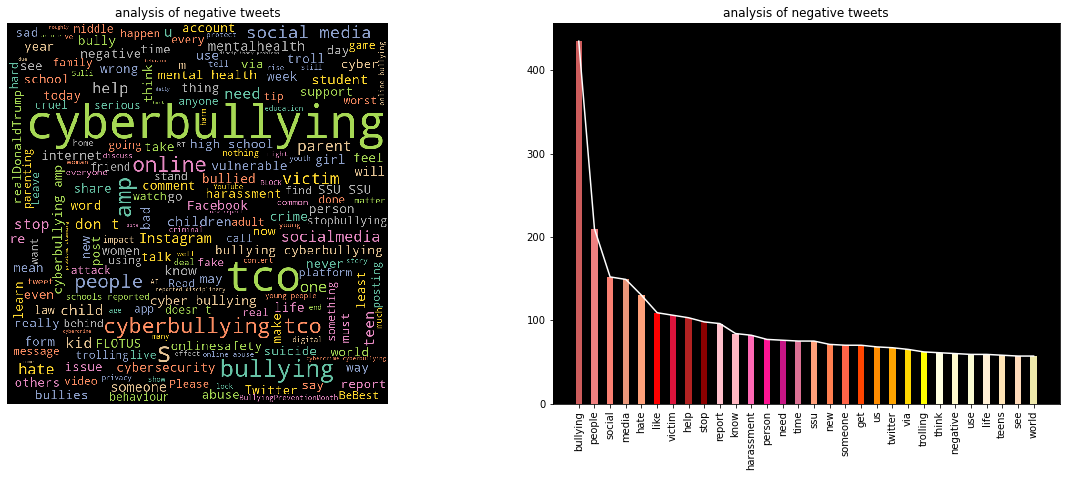

In [45]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,7))

ax1.imshow(wordcloud,interpolation="none")
ax1.set_title('analysis of negative tweets')

ax1.axis('off')


ax2.bar(df2['words'][0:30], df2['frequency'][0:30],color=['indianred','lightcoral','salmon','darksalmon','lightsalmon','red','crimson','firebrick','darkred','pink','lightpink','hotpink','deeppink','mediumvioletred','palevioletred','lightsalmon','coral','tomato','orangered','darkorange','orange','gold','yellow','lightyellow','lemonchiffon','lightgoldenrodyellow','papayawhip','moccasin','peachpuff','palegoldenrod'],width = 0.4)
ax2.set_title('analysis of negative tweets')
ax2.plot(df2['words'][0:30], df2['frequency'][0:30],color='white')
ax2.set_xticklabels(df2['words'][0:30],rotation='vertical',size=10)
ax2.set_facecolor("black")
plt.show()

From the above graphs, we can observe that cyberbullying on social media has led teen agers to attempt suicide
and affects mental health

# Cyberbullying wordcloud post pandemic

In [46]:
data['months'] = pd.to_datetime(data['months'])
mask = (data['months'] > '2020-04') & (data['months'] <= '2021-12')
g=data.loc[mask]
comment_words = ''
stopwords = set(STOPWORDS)
n=g[g['labels']=='negative']
for val in n['Text']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size =10).generate(comment_words)
     
plt.show()

In [47]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
text = ' '.join([word for word in comment_words.split() if word not in (stopwords.words('english'))])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swetha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
nltk.download('words')
words=set(nltk.corpus.words.words())
text= " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\swetha\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [48]:
words=text.split()
len(words)

91297

In [49]:
word=[]
for i in range(91297):
    word.append(words[i])

In [50]:
for i in range(len(word)):
    word[i] = word[i].lower()

In [51]:
word=np.array(word)
(unique,count)=np.unique(word,return_counts=True)
data_word=pd.DataFrame({'words':unique,'frequency':count})
df2=data_word.sort_values('frequency',ascending=False)

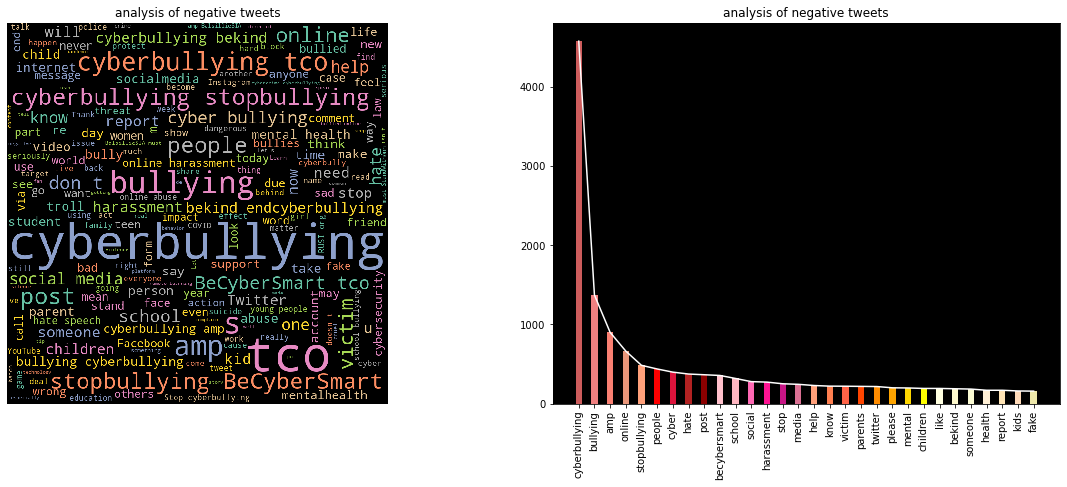

In [53]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,7))

ax1.imshow(wordcloud,interpolation="none")
ax1.set_title('analysis of negative tweets')

ax1.axis('off')


ax2.bar(df2['words'][0:30], df2['frequency'][0:30],color=['indianred','lightcoral','salmon','darksalmon','lightsalmon','red','crimson','firebrick','darkred','pink','lightpink','hotpink','deeppink','mediumvioletred','palevioletred','lightsalmon','coral','tomato','orangered','darkorange','orange','gold','yellow','lightyellow','lemonchiffon','lightgoldenrodyellow','papayawhip','moccasin','peachpuff','palegoldenrod'],width = 0.4)
ax2.set_title('analysis of negative tweets')
ax2.plot(df2['words'][0:30], df2['frequency'][0:30],color='white')
ax2.set_xticklabels(df2['words'][0:30],rotation='vertical',size=10)
ax2.set_facecolor("black")
plt.show()

From this above graphs we can observe that online harrassments and bullying has increased for school kids as well after pandemic



# e Learning

In [53]:
df1 = data_hash[data_hash['hashtag'].str.contains("learning")]
df1

hashtag  frequency
1008       alwayslearning          1
2782      blendedlearning          1
5078     continuelearning          1
6762         deeplearning         19
7118         digilearning          1
...                   ...        ...
24265  studentledlearning          1
24426      summerlearning          1
24599       swiftlearning          2
24996     techforlearning          1
27343     virtuallearning         16

[65 rows x 2 columns]

In [54]:
df2 = data_hash[data_hash['hashtag'].str.contains("education")]
df2

hashtag  frequency
113        21stcenturyeducation          2
438            acerforeducation          1
848            alabamaeducation          1
2084             basiceducation          1
2880           boardofeducation          1
...                         ...        ...
24987             techeducation          1
25266        texaseducationcode          1
25422  thegolbaleducationreoprt          1
26917            urbaneducation          1
27392             vivaeducation          1

[90 rows x 2 columns]

In [55]:
frames = [df1, df2]

result = pd.concat(frames)
result

hashtag  frequency
1008             alwayslearning          1
2782            blendedlearning          1
5078           continuelearning          1
6762               deeplearning         19
7118               digilearning          1
...                         ...        ...
24987             techeducation          1
25266        texaseducationcode          1
25422  thegolbaleducationreoprt          1
26917            urbaneducation          1
27392             vivaeducation          1

[155 rows x 2 columns]

In [56]:
df_sort1=result.sort_values('frequency',ascending=False).reset_index(drop=False)
df_sort1.head(17)

index                  hashtag  frequency
0    8139                education        451
1   18276           onlinelearning        143
2   15288          machinelearning        137
3    7482         distancelearning         96
4   20954           remotelearning         82
5    8263                elearning         76
6   14550                 learning         30
7    7239          digitallearning         27
8   18229          onlineeducation         23
9   16301                mlearning         20
10   6762             deeplearning         19
11  27343          virtuallearning         16
12   7188         digitaleducation         14
13   8142              educational         13
14  10986             hacklearning         12
15  23211  socialemotionallearning         11
16   5962           cybereducation         11

 Frequency Chart for the hashtags having frequency above 10 which are related to learning and education

In [57]:
fig2 = px.bar(df_sort1[:17], x='hashtag', y='frequency',
              color='hashtag',
              height=600, width=900)
fig2.show()



In [58]:
list1 = ['onlinelearning', 'students', 'distancelearning', 'elearning', 'remotelearning', 'onlineclasses', 'learning']

In [59]:
learn_data1 = data[data['hashtags'].str.contains("learning")]

learn_data1['learn_Hashtags'] = data['hashtags'].str.findall(r"\b"+"|".join(list1)+ r"\b").apply(", ".join)

In [60]:
nan_value = float("NaN")
learn_data1.replace("", nan_value, inplace=True)

In [61]:
learn_data1

level_0  Unnamed: 0  index                  Datetime  \
344        497         497    497 2022-02-08 12:06:37+00:00   
681        952         952    952 2022-01-31 18:35:00+00:00   
682        953         953    953 2022-01-31 18:23:31+00:00   
1270      1793        1793   1793 2022-01-14 06:58:21+00:00   
2176      3163        3163   3163 2021-12-06 14:30:16+00:00   
...        ...         ...    ...                       ...   
43932    62502       62502  62513 2019-06-23 02:21:57+00:00   
44002    62588       62588  62599 2019-06-21 14:00:04+00:00   
44422    63091       63091  63103 2019-06-13 00:45:05+00:00   
44424    63093       63093  63105 2019-06-12 23:45:04+00:00   
44861    63625       63625  63637 2019-06-04 11:27:34+00:00   

                  Tweet Id                                               Text  \
344    1491020641599770627  This  SaferInternetDay  we introduce Kindly  a...   
681    1488219280609103878  Top Resources For  Teachers To Refer On  Cyber...   
682    1488216389919948808  I m writing a story about  bullying and  cyber...   
1270   1481883366815571970  Nisaicommitment to the wellbeing of students m...   
2176   1467863967951249413  we present the third committee of SSMUN   the ...   
...                    ...                                                ...   
43932  1142618768025063424     tco aRVQQcI  smartschools  school  digitalc...   
44002  1142069676094177282  Find out more about our top tips for dealing w...   
44422  1138970511155834881  CURSO ONLINE  BULLYING Y CIBERBULLYING La viol...   
44424  1138955406607339520  Yo a eso no juego Gu a de actuaci n frente al ...   
44861  1135870705466261505   wisekids Powys Youth Service creating a space...   

             Username                                           hashtags  \
344    UNICEFinnovate  ['SaferInternetDay', 'cyberbullying', 'machine...   
681            etr_in  ['Teachers', 'Cyberbullying', 'edtech', 'edtec...   
682         JMoJourno  ['bullying', 'cyberbullying', 'COVID19', 'pand...   
1270    NisaiLearning   ['cyberbullying', 'onlinelearning', 'education']   
2176          SSMUN22  ['MUN', 'educational', 'India', 'youth', 'Lead...   
...               ...                                                ...   
43932   Nidhi_iBranch  ['smartschools', 'school', 'digitalcitizsnship...   
44002        TorbayHL  ['schools', 'emotionalhealth', 'anti', 'health...   
44422          eraser  ['elearning', 'mlearning', 'acoso', 'bullying'...   
44424          eraser  ['elearning', 'mlearning', 'acoso', 'bullying'...   
44861    driving_miss  ['wisekids', 'emotionalhealth', 'selfharm', 'r...   

                            location  \
344                     New York, NY   
681                            India   
682                Stockholm, Sweden   
1270   Harrow, England - Head Office   
2176     Sector 16, Panchkula, India   
...                              ...   
43932                         Bhopal   
44002                Torbay, England   
44422                          world   
44424                          world   
44861                  Brecon, Wales   

                                                @_remove    labels  \
344    This #SaferInternetDay, we introduce Kindly, a...  positive   
681    Top Resources For #Teachers To Refer On #Cyber...  positive   
682    I'm writing a story about #bullying and #cyber...  positive   
1270   Nisaicommitment to the wellbeing of students m...   neutral   
2176   we present the third committee of SSMUN , the ...  positive   
...                                                  ...       ...   
43932  https://tco/aRVQQcI #smartschools #school #dig...   neutral   
44002  Find out more about our top tips for dealing w...  positive   
44422  CURSO ONLINE: BULLYING Y CIBERBULLYING La viol...  positive   
44424  Yo a eso no juego Guía de actuación frente al ...   neutral   
44861  #wisekids Powys Youth Service creating a space...  positive   

                        Week     months   

In [62]:
learn_data1= learn_data1.dropna()

In [63]:
learn_data1

level_0  Unnamed: 0  index                  Datetime  \
344        497         497    497 2022-02-08 12:06:37+00:00   
681        952         952    952 2022-01-31 18:35:00+00:00   
682        953         953    953 2022-01-31 18:23:31+00:00   
1270      1793        1793   1793 2022-01-14 06:58:21+00:00   
2176      3163        3163   3163 2021-12-06 14:30:16+00:00   
...        ...         ...    ...                       ...   
43585    62098       62098  62109 2019-06-29 06:46:40+00:00   
43711    62245       62245  62256 2019-06-27 05:10:42+00:00   
43932    62502       62502  62513 2019-06-23 02:21:57+00:00   
44422    63091       63091  63103 2019-06-13 00:45:05+00:00   
44424    63093       63093  63105 2019-06-12 23:45:04+00:00   

                  Tweet Id                                               Text  \
344    1491020641599770627  This  SaferInternetDay  we introduce Kindly  a...   
681    1488219280609103878  Top Resources For  Teachers To Refer On  Cyber...   
682    1488216389919948808  I m writing a story about  bullying and  cyber...   
1270   1481883366815571970  Nisaicommitment to the wellbeing of students m...   
2176   1467863967951249413  we present the third committee of SSMUN   the ...   
...                    ...                                                ...   
43585  1144859713563234305   EdChatEU Schedule July    How to prevent  Cyb...   
43711  1144110785293180928  Are smartphones the key to improving school re...   
43932  1142618768025063424     tco aRVQQcI  smartschools  school  digitalc...   
44422  1138970511155834881  CURSO ONLINE  BULLYING Y CIBERBULLYING La viol...   
44424  1138955406607339520  Yo a eso no juego Gu a de actuaci n frente al ...   

             Username                                           hashtags  \
344    UNICEFinnovate  ['SaferInternetDay', 'cyberbullying', 'machine...   
681            etr_in  ['Teachers', 'Cyberbullying', 'edtech', 'edtec...   
682         JMoJourno  ['bullying', 'cyberbullying', 'COVID19', 'pand...   
1270    NisaiLearning   ['cyberbullying', 'onlinelearning', 'education']   
2176          SSMUN22  ['MUN', 'educational', 'India', 'youth', 'Lead...   
...               ...                                                ...   
43585        EdChatEU  ['EdChatEU', 'CyberBullying', 'ComputingEducat...   
43711   JoanneOrlando  ['digitalliteracy', 'schoolslearning', 'mobile...   
43932   Nidhi_iBranch  ['smartschools', 'school', 'digitalcitizsnship...   
44422          eraser  ['elearning', 'mlearning', 'acoso', 'bullying'...   
44424          eraser  ['elearning', 'mlearning', 'acoso', 'bullying'...   

                            location  \
344                     New York, NY   
681                            India   
682                Stockholm, Sweden   
1270   Harrow, England - Head Office   
2176     Sector 16, Panchkula, India   
...                              ...   
43585                      Europe 🇪🇺   
43711                         Sydney   
43932                         Bhopal   
44422                          world   
44424                          world   

                                                @_remove    labels  \
344    This #SaferInternetDay, we introduce Kindly, a...  positive   
681    Top Resources For #Teachers To Refer On #Cyber...  positive   
682    I'm writing a story about #bullying and #cyber...  positive   
1270   Nisaicommitment to the wellbeing of students m...   neutral   
2176   we present the third committee of SSMUN , the ...  positive   
...                                                  ...       ...   
43585  #EdChatEU Schedule July'\n⃣ How to prevent #Cy...   neutral   
43711  Are smartphones the key to improving school re...   neutral   
43932  https://tco/aRVQQcI #smartschools #school #dig...   neutral   
44422  CURSO ONLINE: BULLYING Y CIBERBULLYING La viol...  positive   
44424  Yo a eso no juego Guía de actuación frente al ...   neutral   

                        Week     months   

# Monthly anaylsis of learning and education 

In [64]:
learn_data1['Datetime']=pd.to_datetime(learn_data1['Datetime'])

In [65]:
learn_data1['Month']=learn_data1['Datetime'].dt.to_period('M').astype(str)

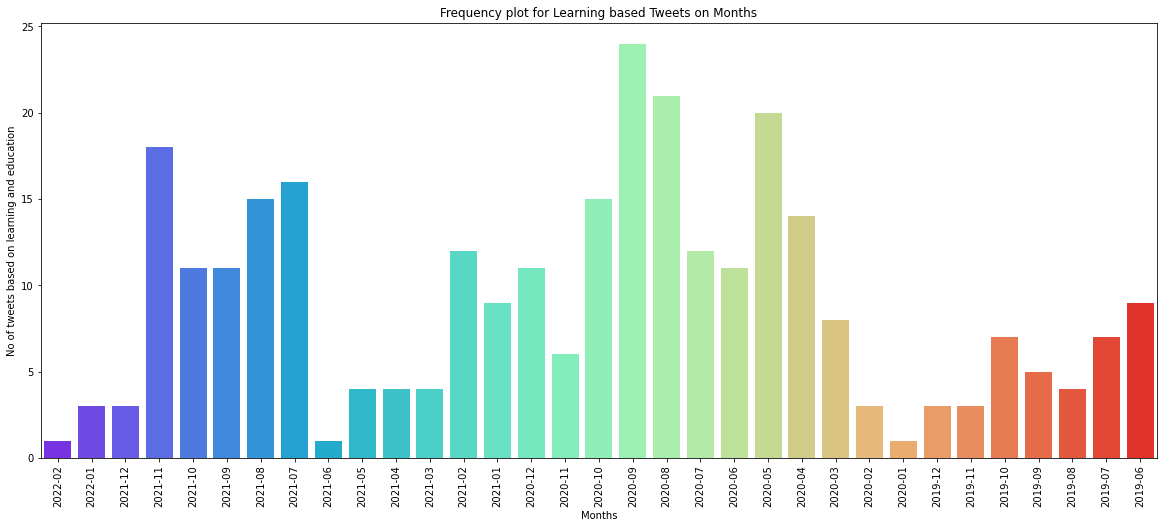

In [66]:
fig =plt.subplots(figsize=(20,8))
sns.countplot(x="Month", data=learn_data1, palette='rainbow')
plt.title("Frequency plot for Learning based Tweets on Months")
plt.xlabel("Months")
plt.ylabel("No of tweets based on learning and education")
plt.xticks(rotation=90)
plt.show()

From the above graph we can observe that online education and virtual learning has also became a main factor while talking about cyberbullying because we can see that the graph has peacked during the lockdown period which paves a way for cyberbullying

In [67]:
Tweet_words = ''

for val in learn_data1['Text']:
    val = str(val) 
    tokens = val.split()

    for i in range(len(tokens)):
        Tweet_words += " ".join(tokens)+" "

In [68]:
Tweet_words1 = Tweet_words.split()
Tweet_words2 = pd.DataFrame(Tweet_words1,columns=['Tweets'])
Tweet_words2

Tweets
0                   This
1       SaferInternetDay
2                     we
3              introduce
4                 Kindly
...                  ...
242537         violencia
242538             curso
242539             acoso
242540        ciberacoso
242541            EDchat

[242542 rows x 1 columns]

In [69]:
Tweet_words3 = pd.DataFrame(Tweet_words2['Tweets'].value_counts(),columns=['Tweets']).reset_index(drop=False)
Tweet_words3.rename(columns = {'Tweets':'Frequency'}, inplace = True)

In [70]:
Tweet_words3.rename(columns = {'index':'Tweets'}, inplace = True)

In [71]:
Tweet_words3 = Tweet_words3.drop(labels=[0],axis=0)

In [72]:
Tweet_words3

Tweets  Frequency
1      cyberbullying       5759
2                 to       4618
3                and       3406
4     onlinelearning       3140
5                  a       3120
...              ...        ...
2211        PdQJpSxh          5
2212       TAAbMILvd          5
2213        orjwjlAD          5
2214        wYXCzOOT          5
2215         nMHxQtw          4

[2215 rows x 2 columns]

In [73]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
Tweet_words3['Tweets'] = Tweet_words3['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swetha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
nan_value1 = float("NaN")
Tweet_words3.replace("", nan_value1, inplace=True)
Tweet_words3 = Tweet_words3.dropna().reset_index(drop=False)

In [75]:
Tweet_words3 = Tweet_words3.sort_values('Frequency',ascending=False).reset_index(drop=False)

# Plotting the frequency chart for learning after splitting 

In [76]:
fig3 = px.bar(Tweet_words3[:40], x='Tweets', y='Frequency',
              color='Tweets',
              height=600, width=900)
fig3.show()

# Gaming

In [77]:
df11 = data_hash[data_hash['hashtag'].str.contains("gaming")]
df11

hashtag  frequency
4108          charitygaming          1
4662            cloudgaming          1
7207          digitalgaming          1
8942        excessivegaming          1
9060         facebookgaming          1
10195                gaming        435
10196       gamingaddiction          2
10197     gamingcommunities          1
10198       gamingcommunity          5
10199            gaminglife          1
10200        gamingmarathon          1
10201           gamingmemes          2
10202       gamingplatforms          1
10203          gamingracism          1
16639        mrstiqu3gaming          1
18243          onlinegaming        183
18244  onlinegamingdisorder          1
18955              pcgaming          1
21164           retrogaming          1
22496        sexismingaming          1
23493    soumulhersougaming          5
26460          twitchgaming          1
27220           videogaming          2
27467              vrgaming          3
28793         youtubegaming          1

In [78]:
df_sort11=df11.sort_values('frequency',ascending=False).reset_index(drop=False)
df_sort11.head(2)

index       hashtag  frequency
0  10195        gaming        435
1  18243  onlinegaming        183

In [79]:
fig2 = px.bar(df_sort11[:2], x='hashtag', y='frequency',
              color='hashtag',
              height=600, width=900)
fig2.show()


In [80]:
list11 = ['gaming','onlinegaming']

In [81]:
game_data = data[data['hashtags'].str.contains("gaming")]

game_data['game_Hashtags'] = data['hashtags'].str.findall(r"\b"+"|".join(list11)+ r"\b").apply(", ".join)

In [82]:
nan_value11 = float("NaN")
game_data.replace("", nan_value11, inplace=True)

In [83]:
game_data

level_0  Unnamed: 0  index                  Datetime  \
34          48          48     48 2022-02-16 12:42:45+00:00   
49          72          72     72 2022-02-15 21:46:14+00:00   
54          81          81     81 2022-02-15 16:33:28+00:00   
59          86          86     86 2022-02-15 14:34:31+00:00   
66          95          95     95 2022-02-15 12:31:43+00:00   
...        ...         ...    ...                       ...   
43752    62292       62292  62303 2019-06-26 14:12:25+00:00   
43970    62548       62548  62559 2019-06-21 19:55:11+00:00   
44613    63333       63333  63345 2019-06-09 13:34:25+00:00   
44635    63359       63359  63371 2019-06-08 15:45:14+00:00   
44711    63452       63452  63464 2019-06-07 05:34:14+00:00   

                  Tweet Id                                               Text  \
34     1493928836672761863  Year    Tour Day   Time to fly en Route to Lou...   
49     1493703223542173699  Year   Tour Day   Thank You Ramapo Ridge th Gr...   
54     1493624511618560003  Year   Tour Day   Thank You Ramapo Ridge th Gr...   
59     1493594578653528070  Year   Tour Day   Thank You Ramapo Ridge th Gr...   
66     1493563674312777728  Year    Tour Day   Students  amp  Faculty of R...   
...                    ...                                                ...   
43752  1143884725523767298  Choose your character  A new episode of our Fu...   
43970  1142159045127593984  Helping Parents with Social Media Power Down  ...   
44613  1137714567625265158   children  onlinesafety first  onlinegaming   ...   
44635  1137385103464783873   children  onlinegaming   Teens   Social media...   
44711  1136868951726706689   children  onlinegaming   Teens   Social media...   

            Username                                           hashtags  \
34     RichardGuerry  ['onlinesafety', 'cyberbullying', 'socialmedia...   
49     RichardGuerry  ['onlinesafety', 'cyberbullying', 'socialmedia...   
54     RichardGuerry  ['onlinesafety', 'cyberbullying', 'socialmedia...   
59     RichardGuerry  ['onlinesafety', 'cyberbullying', 'socialmedia...   
66     RichardGuerry  ['onlinesafety', 'cyberbullying', 'gaming', 's...   
...              ...                                                ...   
43752    futurithmic             ['cyberbullying', 'gaming', 'esports']   
43970    HolliKenley  ['socialmedia', 'parenting', 'cyberbullying', ...   
44613        eKavach  ['children', 'onlinesafety', 'onlinegaming', '...   
44635        eKavach  ['children', 'onlinegaming', 'Teens', 'Social_...   
44711        eKavach  ['children', 'onlinegaming', 'Teens', 'Social_...   

               location                                           @_remove  \
34     Mount Laurel, NJ  Year  🌎 Tour Day : Time to fly en Route to Lou...   
49     Mount Laurel, NJ  Year  🌎Tour Day : Thank You Ramapo Ridge th Gr...   
54     Mount Laurel, NJ  Year  🌎Tour Day : Thank You Ramapo Ridge th Gr...   
59     Mount Laurel, NJ  Year  🌎Tour Day : Thank You Ramapo Ridge th Gr...   
66     Mount Laurel, NJ  Year  🌎 Tour Day : Students &amp; Faculty of R...   
...                 ...                                                ...   
43752            Future  Choose your character! A new episode of our Fu...   
43970  Palm Springs, CA  Helping Parents with Social Media!Power Down &...   
44613  Bangalore, India  #children #onlinesafety first\n#onlinegaming \...   
44635  Bangalore, India  #children\n#onlinegaming \n#Teens \n#Social_me...   
44711  Bangalore, India  #children #onlinegaming \n#Teens \n#Social_med...   

         labels                   Week     months    Month  Year game_Hashtags  
34     positive  2022-02-14/2022-02-20 2022-02-01  2022-02  2022        gaming  
49     positive  2022-02-14/2022-02-20 2022-02-01  2022-02  2022        gaming  
54     positive  2022-02-14/2022-02-20 2022-02-01  2022-02  2022        gaming  
59     positive  2022-02-14/2022-02-20 2022-02-01  2022-02  2022        gaming  
66     positive  2022-02-14/2022-0

# Monthly analysis of gaming 

In [84]:
game_data['Datetime']=pd.to_datetime(game_data['Datetime'])

In [85]:
game_data['Month']=game_data['Datetime'].dt.to_period('M').astype(str)

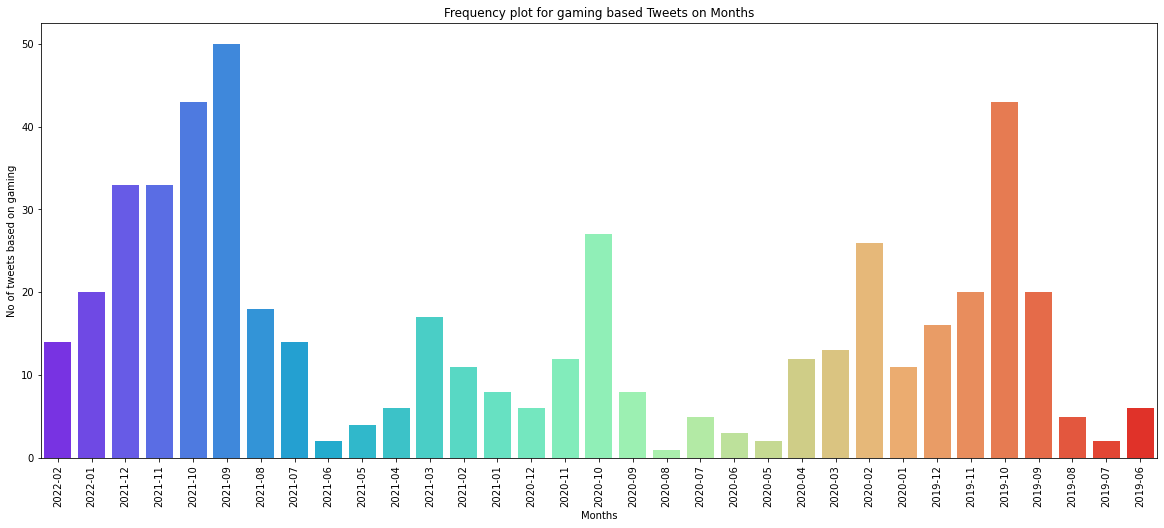

In [86]:
fig =plt.subplots(figsize=(20,8))
sns.countplot(x="Month", data=game_data, palette='rainbow')
plt.title("Frequency plot for gaming based Tweets on Months")
plt.xlabel("Months")
plt.ylabel("No of tweets based on gaming")
plt.xticks(rotation=90)
plt.show()

From this graph we can say that when gaming platforms like pubg was banned, the rate of cyberbullying has decreased and 
when it was relaunched it has reached its peak again

In [87]:
Tweet_words11 = ''

for val in game_data['Text']:
    val = str(val) 
    tokens = val.split()

    for i in range(len(tokens)):
        Tweet_words11 += " ".join(tokens)+" "

In [88]:
Tweet_words21 = Tweet_words11.split()
Tweet_words22 = pd.DataFrame(Tweet_words21,columns=['Tweets'])
Tweet_words22

Tweets
0                    Year
1                    Tour
2                     Day
3                    Time
4                      to
...                   ...
470578            eKavach
470579  internetaddiction
470580      parentingtips
470581                tco
470582           cwlNGMYq

[470583 rows x 1 columns]

In [89]:
Tweet_words23 = pd.DataFrame(Tweet_words22['Tweets'].value_counts(),columns=['Tweets']).reset_index(drop=False)
Tweet_words23.rename(columns = {'Tweets':'Frequency'}, inplace = True)

In [90]:
Tweet_words23.rename(columns = {'index':'Tweets'}, inplace = True)

In [91]:
Tweet_words23 = Tweet_words23.drop(labels=[0],axis=0)

In [92]:
Tweet_words23

Tweets  Frequency
1      onlinesafety      12766
2                 s      12367
3            gaming      11433
4     cyberbullying      11268
5               and      10724
...             ...        ...
1983       ACpgIBZm          7
1984        GlFukhc          6
1985        bvwJnBq          6
1986          bully          4
1987       SiuEWbqe          4

[1987 rows x 2 columns]

In [93]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
Tweet_words23['Tweets'] = Tweet_words23['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swetha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
nan_value11 = float("NaN")
Tweet_words23.replace("", nan_value11, inplace=True)
Tweet_words23 = Tweet_words23.dropna().reset_index(drop=False)

In [95]:
Tweet_words23 = Tweet_words23.sort_values('Frequency',ascending=False).reset_index(drop=False)

# Plotting the frequency chart for gaming after splitting 

In [96]:
fig3 = px.bar(Tweet_words23[:40], x='Tweets', y='Frequency',
              color='Tweets',
              height=600, width=900)
fig3.show()

# Social Media

In [97]:
df22 = data_hash[data_hash['hashtag'].str.contains("social")]
df22

hashtag  frequency
425       accionsocialmedicina          3
629           adultsocialmedia          1
791            aiforsocialgood          1
1374                antisocial          1
1375           antisocialmedia          2
...                        ...        ...
25546         thesocialdilemma          1
26323         truthsocialmedia          1
27414           vocalforsocial          2
28373      worldsocialmediaday          4
28374  worldsocialmediaday2020          1

[287 rows x 2 columns]

In [98]:
df_sort22=df22.sort_values('frequency',ascending=False).reset_index(drop=False)
df_sort22.head(19)

index                  hashtag  frequency
0   23254              socialmedia       2667
1   23171             social_media        266
2   23182          socialawareness        113
3   24573        swachhsocialmedia        112
4   23170                   social         88
5   20836            redessociales         64
6   23344           socialnetworks         59
7   23310     socialmediamarketing         46
8   23204         socialdistancing         30
9   23340            socialnetwork         26
10  23355              socialsafer         24
11  23268      socialmediabullying         21
12  23278           socialmediaday         21
13  23322        socialmediasafety         21
14  23214        socialengineering         18
15  23185           socialbullying         16
16  23242            socialjustice         13
17  23342         socialnetworking         13
18  23211  socialemotionallearning         11

In [99]:
fig2 = px.bar(df_sort22[:19], x='hashtag', y='frequency',
              color='hashtag',
              height=600, width=900)
fig2.show()


In [100]:
list22 = ['socialmedia',
'social_media',
'socialawareness',
'swachhsocialmedia',
'social',
'redessociales',
'socialnetworks',
'socialmediamarketing',
'socialdistancing',
'socialnetwork',
'socialsafer',
'socialmediabullying',
'socialmediaday',
'socialmediasafety',
'socialengineering',
'socialbullying',
'socialjustice',
'socialnetworking',
'socialemotionallearning']

In [101]:
social_data = data[data['hashtags'].str.contains("social")]

social_data['social_Hashtags'] = data['hashtags'].str.findall(r"\b"+"|".join(list22)+ r"\b").apply(", ".join)

In [102]:
nan_value22 = float("NaN")
social_data.replace("", nan_value22, inplace=True)

In [103]:
social_data

level_0  Unnamed: 0  index                  Datetime  \
26          36          36     36 2022-02-16 15:24:02+00:00   
27          37          37     37 2022-02-16 15:22:28+00:00   
34          48          48     48 2022-02-16 12:42:45+00:00   
39          54          54     54 2022-02-16 11:40:03+00:00   
44          63          63     63 2022-02-16 07:23:56+00:00   
...        ...         ...    ...                       ...   
44906    63674       63674  63686 2019-06-03 17:14:22+00:00   
44929    63702       63702  63714 2019-06-03 12:06:53+00:00   
44972    63755       63755  63767 2019-06-02 00:00:34+00:00   
45014    63804       63804  63816 2019-06-01 00:25:05+00:00   
45017    63807       63807  63819 2019-06-01 00:09:19+00:00   

                  Tweet Id                                               Text  \
26     1493969427146096642  We ve been getting in loads of cartoons about ...   
27     1493969034026569730  RESCHEDULED  Are you aware of today s dangers ...   
34     1493928836672761863  Year    Tour Day   Time to fly en Route to Lou...   
39     1493913058124644355  We ve been getting in loads of cartoons about ...   
44     1493848606029189120   Trolls need a reaction  so you should ignore ...   
...                    ...                                                ...   
44906  1135595592359587840   hsmelkboshs Revising policies and the Code of...   
44929  1135518212307673089  Bagaimana penjelasan selengkapnya tentang cybe...   
44972  1134973039781842945  Did you know that social media isn t necessari...   
45014  1134616821427068930  Find trusted and experienced defamation attorn...   
45017  1134612857046257664  Brits increasingly concerned about going onlin...   

              Username                                           hashtags  \
26     cartoonmovement  ['cyberbullying', 'online', 'abuse', 'internet...   
27          TutorASATS                   ['socialmedia', 'cyberbullying']   
34       RichardGuerry  ['onlinesafety', 'cyberbullying', 'socialmedia...   
39     cartoonmovement  ['cyberbullying', 'online', 'abuse', 'internet...   
44       UnistalGlobal  ['Trolls', 'Trolls', 'trolling', 'socialmediat...   
...                ...                                                ...   
44906       NedineBlom  ['socialmediabullying', 'Cyberbullying', 'Rule...   
44929   pijarpsikologi  ['UnderstandingHuman', 'psikologi', 'bullying'...   
44972     RMWarnerLaw1  ['freespeech', 'freespeechissues', 'firstamend...   
45014     RMWarnerLaw1  ['defamation', 'internetdefamation', 'defamati...   
45017     HarassNoMore    ['cyberbullying', 'socialmedia', 'etechnology']   

                         location  \
26                      Amsterdam   
27                   Brooklyn, NY   
34               Mount Laurel, NJ   
39                      Amsterdam   
44                      New Delhi   
...                           ...   
44906                South Africa   
44929                   Indonesia   
44972              Scottsdale, AZ   
45014              Scottsdale, AZ   
45017  Victoria, British Columbia   

                                                @_remove    labels  \
26     We've been getting in loads of cartoons about ...   neutral   
27     RESCHEDULED: Are you aware of today’s dangers ...  positive   
34     Year  🌎 Tour Day : Time to fly en Route to Lou...  positive   
39     We've been getting in loads of cartoons about ...   neutral   
44     #Trolls need a reaction, so you should ignore ...   neutral   
...                                                  ...       ...   
44906  @hsmelkboshs Revising policies and the Code of...  positive   
44929  Bagaimana penjelasan selengkapnya tentang cybe...   neutral   
44972  Did you know that social media isn't necessari...  positive   
45014  Find trusted and experienced defamation attorn...  positive   
45017  Brits increasingly concerned about going onlin...   neutral   

                        Week     months    Month  Year social_Hash

# Monthly analysis of social media 

In [104]:
social_data['Month']=social_data['Datetime'].dt.to_period('M').astype(str)

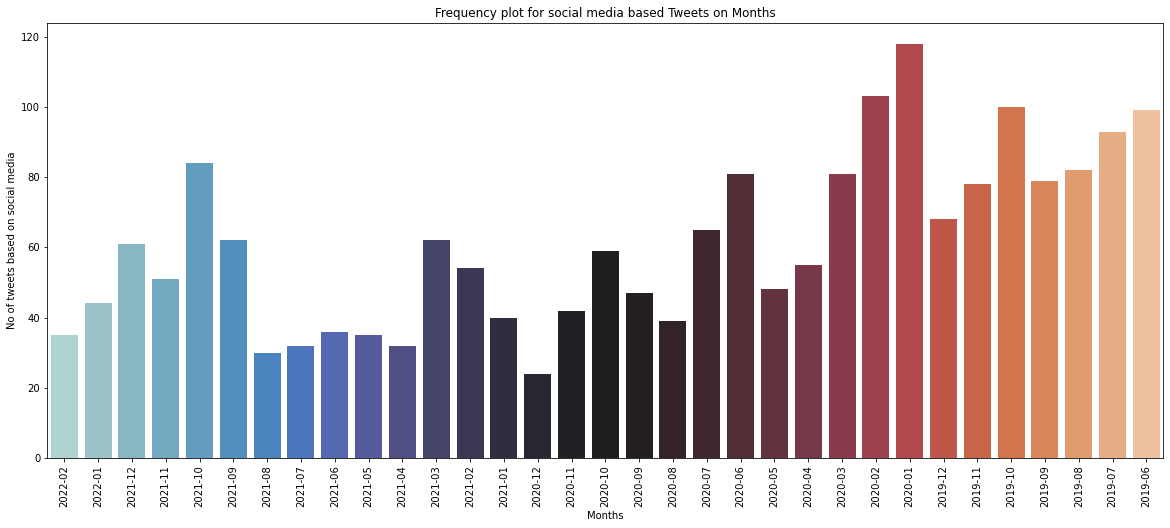

In [105]:
fig =plt.subplots(figsize=(20,8))
sns.countplot(x="Month", data=social_data, palette='icefire')
plt.title("Frequency plot for social media based Tweets on Months")
plt.xlabel("Months")
plt.ylabel("No of tweets based on social media")
plt.xticks(rotation=90)
plt.show()

In [106]:
Tweet_words22 = ''

for val in social_data['Text']:
    val = str(val) 
    tokens = val.split()

    for i in range(len(tokens)):
        Tweet_words22 += " ".join(tokens)+" "

In [107]:
Tweet_words31 = Tweet_words22.split()
Tweet_words32 = pd.DataFrame(Tweet_words31,columns=['Tweets'])
Tweet_words32

Tweets
0                 We
1                 ve
2               been
3            getting
4                 in
...              ...
1622933          amp
1622934  etechnology
1622935    providers
1622936          tco
1622937    QjarKXAav

[1622938 rows x 1 columns]

In [108]:
Tweet_words33 = pd.DataFrame(Tweet_words32['Tweets'].value_counts(),columns=['Tweets']).reset_index(drop=False)
Tweet_words33.rename(columns = {'Tweets':'Frequency'}, inplace = True)

In [109]:
Tweet_words33.rename(columns = {'index':'Tweets'}, inplace = True)

In [110]:
Tweet_words33 = Tweet_words33.drop(labels=[0],axis=0)

In [111]:
Tweet_words33

Tweets  Frequency
1           cyberbullying      45493
2             socialmedia      41579
3                      to      33882
4                     the      29948
5                      of      27333
...                   ...        ...
10523     cybertiptuesday          4
10524             XBKgftR          4
10525            gufwjAaw          4
10526              sWuaoC          4
10527  stoponlinebullying          4

[10527 rows x 2 columns]

In [112]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
Tweet_words33['Tweets'] = Tweet_words33['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swetha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [113]:
nan_value22 = float("NaN")
Tweet_words33.replace("", nan_value22, inplace=True)
Tweet_words33 = Tweet_words33.dropna().reset_index(drop=False)

In [114]:
Tweet_words33 = Tweet_words33.sort_values('Frequency',ascending=False).reset_index(drop=False)

# Plotting the frequency chart for social media after splitting 

In [115]:
fig3 = px.bar(Tweet_words33[:40], x='Tweets', y='Frequency',
              color='Tweets',
              height=600, width=900)
fig3.show()